In [39]:
import torchvision
import torchvision.transforms as transforms
from __future__ import print_function
import torch
import torch.nn
from torch.autograd import Variable

In [40]:
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

Files already downloaded
Files already downloaded


In [41]:
len(trainloader)

15000

In [42]:
dir(trainset)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 'download',
 'processed_folder',
 'raw_folder',
 'root',
 'target_transform',
 'test_file',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'urls']

In [43]:
trainset.train_data.size()

torch.Size([60000, 28, 28])

In [44]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.size()

torch.Size([4, 1, 28, 28])

In [45]:
unqlabs = set()
for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data
    print (len(labels))
    unqlabs.add(labels)
    break

unqlabs

4


{
  9
  3
  0
  4
 [torch.LongTensor of size 4]}

In [46]:
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

#### Neural Net

In [47]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*4*4, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [48]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.Adam(net.parameters(), lr = 0.0001)

In [49]:
for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.923
[1,  4000] loss: 0.349
[1,  6000] loss: 0.254
[1,  8000] loss: 0.192
[1, 10000] loss: 0.163
[1, 12000] loss: 0.139
[1, 14000] loss: 0.134
[2,  2000] loss: 0.103
[2,  4000] loss: 0.104
[2,  6000] loss: 0.099
[2,  8000] loss: 0.090
[2, 10000] loss: 0.089
[2, 12000] loss: 0.086
[2, 14000] loss: 0.074
Finished Training


In [50]:
for g in net.parameters():
    print (g.grad.max())

Variable containing:
1.00000e-02 *
  1.1743
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  2.3231
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  7.3210
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  1.6171
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  4.7573
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-04 *
  7.2954
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  5.2373
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-04 *
  7.1864
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-02 *
  1.0489
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  1.7104
[torch.FloatTensor of size 1]



GroundTruth:      7     2     1     0


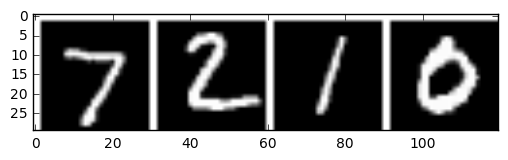

In [51]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [52]:
outputs = net(Variable(images))

# the outputs are energies for the 10 classes. 
# Higher the energy for a class, the more the network 
# thinks that the image is of the particular class

# So, let's get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))

Predicted:      7     2     1     0


In [53]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


In [54]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


In [55]:
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 98 %
Accuracy of     2 : 98 %
Accuracy of     3 : 98 %
Accuracy of     4 : 97 %
Accuracy of     5 : 98 %
Accuracy of     6 : 99 %
Accuracy of     7 : 96 %
Accuracy of     8 : 94 %
Accuracy of     9 : 98 %
